In [100]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [101]:
reddit = pd.read_csv("./reddit_res/reddit_sentiment_comment_geriberta.csv")
twitter = pd.read_feather('./twitter_res/twitter_new_analysis.ftr')

reddit["negativeSentimentScore"] = reddit["Scores"].map(lambda x: eval(x)[0][0])
reddit["neutralSentimentScore"] = reddit["Scores"].map(lambda x: eval(x)[0][1])
reddit["positiveSentimentScore"] = reddit["Scores"].map(lambda x: eval(x)[0][2])
reddit['created'] = pd.to_datetime(reddit['created'])

twitter["negativeSentimentScore"] = twitter["sentimentScore"].map(lambda x: x[0])
twitter["neutralSentimentScore"] = twitter["sentimentScore"].map(lambda x: x[1])
twitter["positiveSentimentScore"] = twitter["sentimentScore"].map(lambda x: x[2])


In [102]:
reddit = reddit.groupby(reddit["created"].dt.to_period('D')).filter(lambda x: len(x) >= 5)

In [103]:
twitter['tweet_ts'] = pd.to_datetime(twitter['tweet_ts'])
twitter = twitter.groupby(twitter["tweet_ts"].dt.to_period('D')).mean().reset_index()
twitter['tweet_ts'] = pd.PeriodIndex(twitter['tweet_ts'], freq='D').to_timestamp()
twitter = twitter.sort_values(by=['tweet_ts'])
twitter = twitter.rename(columns={'tweet_ts': 'date'})
twitter

,date,negativeSentimentScore,neutralSentimentScore,positiveSentimentScore
0,2021-12-29,0.288798,0.507556,0.203646
1,2021-12-30,0.301905,0.495676,0.202420
2,2021-12-31,0.332304,0.448672,0.219024
3,2022-01-01,0.278762,0.443157,0.278081
4,2022-01-02,0.244493,0.504610,0.250897
...,...,...,...,...
464,2023-11-04,0.224787,0.531090,0.244123
465,2023-12-01,0.269071,0.521322,0.209607
466,2023-12-02,0.246236,0.547062,0.206702
467,2023-12-03,0.296639,0.521209,0.182152


In [104]:
reddit = reddit.groupby(reddit["created"].dt.to_period('D')).mean().reset_index()
reddit['created'] = pd.PeriodIndex(reddit['created'], freq='D').to_timestamp()
reddit = reddit.sort_values(by=['created'])
reddit = reddit.rename(columns={'created': 'date'})
reddit

,date,Unnamed: 0,negativeSentimentScore,neutralSentimentScore,positiveSentimentScore
0,2021-08-11,3772.714286,0.118129,0.736293,0.145571
1,2022-07-30,3733.076923,0.282081,0.469231,0.248658
2,2022-11-21,3673.121212,0.143361,0.576953,0.279685
3,2022-11-22,3682.600000,0.083260,0.345350,0.571370
4,2023-01-13,4833.615385,0.046062,0.559662,0.394285
...,...,...,...,...,...
71,2023-05-20,5231.678092,0.095098,0.548501,0.356404
72,2023-05-21,4327.582353,0.112571,0.480248,0.407192
73,2023-05-22,2565.351942,0.101730,0.446358,0.451911
74,2023-05-23,3692.420382,0.097116,0.547395,0.355487


In [105]:
twitter["gradient_neg"] = twitter["negativeSentimentScore"].diff()
twitter["gradient_pos"] = twitter["positiveSentimentScore"].diff()
twitter = twitter.sort_values(by="gradient_neg")
twitter


,date,negativeSentimentScore,neutralSentimentScore,positiveSentimentScore,gradient_neg,gradient_pos
182,2022-07-01,0.254396,0.507394,0.238210,-0.103144,0.060859
393,2023-02-13,0.222197,0.527341,0.250462,-0.097111,0.053753
124,2022-05-04,0.280967,0.513276,0.205757,-0.088672,-0.080552
464,2023-11-04,0.224787,0.531090,0.244123,-0.087431,0.062575
155,2022-06-04,0.259605,0.512802,0.227593,-0.086647,0.046778
...,...,...,...,...,...,...
280,2022-10-07,0.343008,0.473447,0.183545,0.105234,-0.058180
181,2022-06-30,0.357540,0.465109,0.177351,0.106896,-0.057953
113,2022-04-23,0.268631,0.478755,0.252613,0.109946,-0.154014
36,2022-02-03,0.365868,0.419921,0.214211,0.121227,-0.029245


In [106]:
reddit["gradient_neg"] = reddit["negativeSentimentScore"].diff()
reddit["gradient_pos"] = reddit["positiveSentimentScore"].diff()
reddit = reddit.sort_values(by="gradient_neg")
reddit

,date,Unnamed: 0,negativeSentimentScore,neutralSentimentScore,positiveSentimentScore,gradient_neg,gradient_pos
16,2023-03-02,4617.333333,0.027650,0.750350,0.222017,-0.215905,0.074804
14,2023-02-24,4642.400000,0.017140,0.271700,0.711180,-0.173035,0.367316
2,2022-11-21,3673.121212,0.143361,0.576953,0.279685,-0.138720,0.031027
43,2023-04-22,6370.384615,0.006292,0.468208,0.525500,-0.113108,0.123658
50,2023-04-29,5976.800000,0.022120,0.680340,0.297520,-0.106402,-0.055415
...,...,...,...,...,...,...,...
53,2023-05-02,5338.570588,0.148514,0.548257,0.303236,0.141197,0.145369
44,2023-04-23,5438.833333,0.158483,0.480883,0.360650,0.152191,-0.164850
1,2022-07-30,3733.076923,0.282081,0.469231,0.248658,0.163952,0.103086
15,2023-03-01,4613.354839,0.243555,0.609226,0.147213,0.226415,-0.563967


In [107]:
combined = pd.merge(twitter, reddit, on="date", how="outer")
combined.drop(columns=["Unnamed: 0", "neutralSentimentScore_x", "neutralSentimentScore_y"], inplace=True)
combined.rename(columns={"negativeSentimentScore_x": "twitter_neg", 
                                    "positiveSentimentScore_x": "twitter_pos", 
                                    "gradient_neg_x": "twitter_grad_neg", 
                                    "gradient_pos_x": "twitter_grad_pos",
                                    "negativeSentimentScore_y": "reddit_neg",
                                    "positiveSentimentScore_y": "reddit_pos",
                                    "gradient_neg_y": "reddit_grad_neg",
                                    "gradient_pos_y": "reddit_grad_pos"},
                                    inplace = True)
combined.fillna(0, inplace=True)
combined["pos_grad"] = combined["twitter_grad_pos"] + combined["reddit_grad_pos"]
combined["neg_grad"] = combined["twitter_grad_neg"] + combined["reddit_grad_neg"]
combined.sort_values(by="neg_grad", inplace=True)
combined

,date,twitter_neg,twitter_pos,twitter_grad_neg,twitter_grad_pos,reddit_neg,reddit_pos,reddit_grad_neg,reddit_grad_pos,pos_grad,neg_grad
106,2023-03-02,0.236104,0.236180,-0.022974,0.019555,0.027650,0.222017,-0.215905,0.074804,0.094359,-0.238879
54,2022-11-21,0.255631,0.211853,-0.046346,0.012814,0.143361,0.279685,-0.138720,0.031027,0.043841,-0.185066
219,2023-02-24,0.238216,0.213801,-0.001729,-0.010630,0.017140,0.711180,-0.173035,0.367316,0.356686,-0.174764
49,2023-05-04,0.230093,0.248192,-0.048984,0.048339,0.128727,0.465247,-0.070540,0.224575,0.272914,-0.119524
51,2023-04-04,0.242105,0.239378,-0.047475,0.043475,0.104504,0.241122,-0.067457,-0.382559,-0.339084,-0.114932
...,...,...,...,...,...,...,...,...,...,...,...
301,2023-03-24,0.245482,0.245574,0.009576,0.000451,0.203886,0.064829,0.112848,-0.430539,-0.430088,0.122424
511,2023-04-23,0.000000,0.000000,0.000000,0.000000,0.158483,0.360650,0.152191,-0.164850,-0.164850,0.152191
383,2023-05-02,0.275093,0.202695,0.030123,0.003667,0.148514,0.303236,0.141197,0.145369,0.149037,0.171321
431,2022-07-30,0.365795,0.179240,0.050057,-0.020715,0.282081,0.248658,0.163952,0.103086,0.082372,0.214009


In [117]:
def getTimeseriesSentimentGraph(df):
    fig = plt.figure(figsize = (10, 5))
    fig.patch.set_facecolor('white')

    ax=plt.axes()
    ax.patch.set_facecolor('white')
    ax.spines[['top','left','bottom']].set_visible(False)
    # Make the left spine thicker
    ax.spines['right'].set_linewidth(1.1)
    plt.grid(which="major", axis='x', color='#DAD8D7', alpha=0.25, zorder=1)
    plt.grid(which="major", axis='y', color='#DAD8D7', alpha=0.25, zorder=1)
    
    #dfLimits = df.agg({ 'date' : [np.min, np.max]})
    #print("New DS limits: ", dfLimits["date"]["amin"])

    #fromD = dfLimits["date"]["amin"].strftime("%d/%m/%Y")
    #toD = dfLimits["date"]["amax"].strftime("%d/%m/%Y")
    #plt.title(f"Gradient of sentiment {fromD} - {toD}")

    sns.lineplot(data=df, x ='date', y = 'twitter_neg', legend='full', lw=1.5, label="Twitter negative", color='#E53935')
    sns.lineplot(data=df, x ='date', y = 'twitter_pos', legend='full', lw=1.5, label="Twitter positive", color='#009688')
    sns.lineplot(data=df, x ='date', y = 'reddit_neg', legend='full', lw=1.5, label="Reddit negative", color='#F4511E')
    sns.lineplot(data=df, x ='date', y = 'reddit_pos', legend='full', lw=1.5, label="Reddit positive", color='#689F38')

    legend = plt.legend(bbox_to_anchor=(1, 1))
    frame = legend.get_frame()
    frame.set_facecolor('white')

    plt.ylabel('Sentiment score')
    plt.xlabel('')
    plt.show()



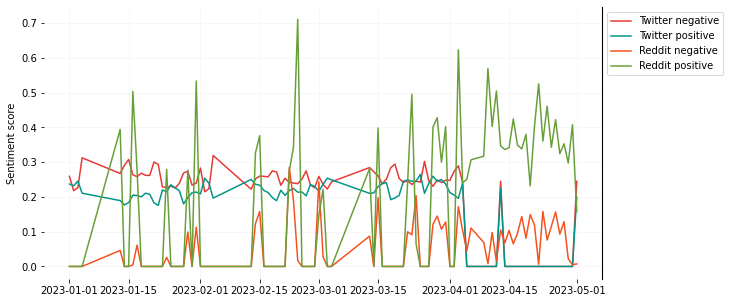

In [118]:
start_date = pd.to_datetime('2023-01-01')
end_date = pd.to_datetime('2023-05-01')

mask = (combined['date'] >= start_date) & (combined['date'] <= end_date)

# Apply the mask to the DataFrame to select the rows within the date range
selected_rows = combined[mask]
getTimeseriesSentimentGraph(selected_rows)

In [119]:
combined.corr()

,twitter_neg,twitter_pos,twitter_grad_neg,twitter_grad_pos,reddit_neg,reddit_pos,reddit_grad_neg,reddit_grad_pos,pos_grad,neg_grad
twitter_neg,1.000000,0.732615,0.210003,-0.181186,-0.526116,-0.691345,0.081811,-0.027596,-0.098530,0.204828
twitter_pos,0.732615,1.000000,-0.148543,0.208448,-0.503324,-0.655754,0.031341,-0.024573,0.062553,-0.090257
twitter_grad_neg,0.210003,-0.148543,1.000000,-0.786884,0.017943,-0.019693,0.091050,-0.015687,-0.333957,0.792562
twitter_grad_pos,-0.181186,0.208448,-0.786884,1.000000,0.008799,0.013875,-0.051043,0.028903,0.432493,-0.611039
reddit_neg,-0.526116,-0.503324,0.017943,0.008799,1.000000,0.774275,0.325751,-0.091377,-0.078847,0.212689
reddit_pos,-0.691345,-0.655754,-0.019693,0.013875,0.774275,1.000000,-0.102326,0.243859,0.225603,-0.077168
reddit_grad_neg,0.081811,0.031341,0.091050,-0.051043,0.325751,-0.102326,1.000000,-0.376938,-0.360748,0.679421
reddit_grad_pos,-0.027596,-0.024573,-0.015687,0.028903,-0.091377,0.243859,-0.376938,1.000000,0.913761,-0.242370
pos_grad,-0.098530,0.062553,-0.333957,0.432493,-0.078847,0.225603,-0.360748,0.913761,1.000000,-0.466961
neg_grad,0.204828,-0.090257,0.792562,-0.611039,0.212689,-0.077168,0.679421,-0.242370,-0.466961,1.000000
